#RECOMMENDATION SYSTEM


In [1]:
import pandas as pd
import numpy as np
df=pd.read_csv('anime.csv')
df

,anime_id,name,genre,type,episodes,rating,members
0,32281,Kimi no Na wa.,"Drama, Romance, School, Supernatural",Movie,1,9.37,200630
1,5114,Fullmetal Alchemist: Brotherhood,"Action, Adventure, Drama, Fantasy, Magic, Mili...",TV,64,9.26,793665
2,28977,Gintama°,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.25,114262
3,9253,Steins;Gate,"Sci-Fi, Thriller",TV,24,9.17,673572
4,9969,Gintama&#039;,"Action, Comedy, Historical, Parody, Samurai, S...",TV,51,9.16,151266
...,...,...,...,...,...,...,...
12289,9316,Toushindai My Lover: Minami tai Mecha-Minami,Hentai,OVA,1,4.15,211
12290,5543,Under World,Hentai,OVA,1,4.28,183
12291,5621,Violence Gekiga David no Hoshi,Hentai,OVA,4,4.88,219
12292,6133,Violence Gekiga Shin David no Hoshi: Inma Dens...,Hentai,OVA,1,4.98,175


In [2]:
len(df)

12294

In [3]:
len(df.anime_id.unique())
df['anime_id'].value_counts()

,count
anime_id,
26081,1
32281,1
5114,1
28977,1
9253,1
...,...
4181,1
15417,1
15335,1


In [4]:
len(df.name.unique())
df['name'].value_counts()

,count
name,
Saru Kani Gassen,2
Shi Wan Ge Leng Xiaohua,2
Bary-san x Gospe Rats: Tonde Bary Bary Monogatari,1
Ba La La Xiao Mo Xian Zhi: Qiji Wubu,1
Backkom Meogeujan Yeohaeng,1
...,...
3-gatsu no Lion meets Bump of Chicken,1
Bannou Bunka Neko-Musume,1
Choujikuu Seiki Orguss,1


In [5]:
len(df.members.unique())

6706

In [6]:
len(df.rating.unique())

599

In [7]:
df['rating'].value_counts()

,count
rating,
6.00,141
7.00,99
6.50,90
6.25,84
5.00,76
...,...
2.98,1
3.44,1
1.92,1


<Axes: >

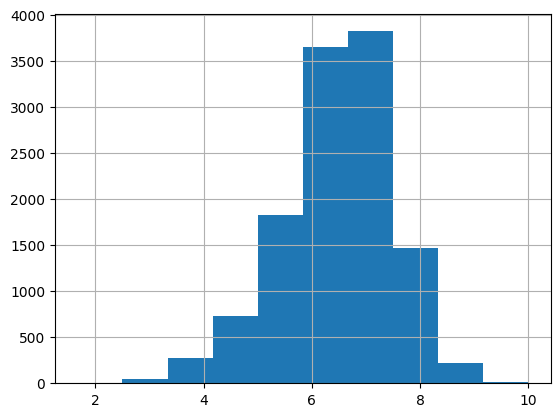

In [8]:
df['rating'].hist()

In [9]:
len(df.genre.unique())

3265

In [10]:
df['genre'].value_counts()

,count
genre,
Hentai,823
Comedy,523
Music,301
Kids,199
"Comedy, Slice of Life",179
...,...
"Hentai, Parody, Sci-Fi",1
"Hentai, Historical, Mystery",1
"Action, Comedy, Hentai",1


In [11]:
#create user item matrix
user_df=df.pivot_table(index='members',columns='name',values='rating')
user_df

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,◯
members,,,,,,,,,,,,,,,,,,,,,
12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717796,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
793665,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
893100,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
#Impute those NaNs with 0 values
user_df.fillna(0, inplace=True)
user_df

name,&quot;0&quot;,"&quot;Aesop&quot; no Ohanashi yori: Ushi to Kaeru, Yokubatta Inu",&quot;Bungaku Shoujo&quot; Kyou no Oyatsu: Hatsukoi,&quot;Bungaku Shoujo&quot; Memoire,&quot;Bungaku Shoujo&quot; Movie,&quot;Eiji&quot;,&quot;Eiyuu&quot; Kaitai,.hack//G.U. Returner,.hack//G.U. Trilogy,.hack//G.U. Trilogy: Parody Mode,...,"on-chan, Yume Power Daibouken!",s.CRY.ed,vivi,xxxHOLiC,xxxHOLiC Kei,xxxHOLiC Movie: Manatsu no Yoru no Yume,xxxHOLiC Rou,xxxHOLiC Shunmuki,Üks Uks,◯
members,,,,,,,,,,,,,,,,,,,,,
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
793665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
893100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [13]:
#compute user similarity
from sklearn.metrics import pairwise_distances
user_sim=1-pairwise_distances(user_df.values,metric='cosine')
user_sim

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [14]:
np.fill_diagonal(user_sim,0)
user_sim

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [15]:
user_sim_df=pd.DataFrame(user_sim)
user_sim_df

,0,1,2,3,4,5,6,7,8,9,...,6590,6591,6592,6593,6594,6595,6596,6597,6598,6599
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6595,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6596,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6597,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6598,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
user_sim_df=pd.DataFrame(user_sim)
user_sim_df.index=user_df.index
user_sim_df.columns=user_df.index
user_sim_df

members,12,13,15,17,20,21,22,24,25,26,...,633817,657190,673572,683297,715151,717796,793665,893100,896229,1013917
members,,,,,,,,,,,,,,,,,,,,,
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
20,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
717796,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
793665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
893100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [17]:
user_sim_df.max()

,0
members,
12,0.0
13,0.0
15,0.0
17,0.0
20,0.0
...,...
717796,0.0
793665,0.0
893100,0.0


In [18]:
user_sim_df.idxmax(axis=1)

,0
members,
12,12
13,12
15,12
17,12
20,12
...,...
717796,12
793665,12
893100,12


In [19]:
from scipy.sparse import csr_matrix
import numpy as np

# Create a sparse user-item matrix
# We need a mapping from original anime_id and user_id to the matrix indices
user_id_map = {user_id: i for i, user_id in enumerate(df['members'].unique())}
anime_id_map = {anime_id: i for i, anime_id in enumerate(df['anime_id'].unique())}

# Create a DataFrame with mapped indices
mapped_df = df.copy()
mapped_df['member_idx'] = mapped_df['members'].map(user_id_map)
mapped_df['anime_idx'] = mapped_df['anime_id'].map(anime_id_map)

# Fill NaN values in the 'rating' column with 0 before creating the sparse matrix
mapped_df['rating'] = mapped_df['rating'].fillna(0)


# Create the sparse matrix
# Row indices are member_idx, column indices are anime_idx, data is the rating
sparse_user_item_matrix = csr_matrix((mapped_df['rating'], (mapped_df['member_idx'], mapped_df['anime_idx'])))

print("Sparse user-item matrix shape:", sparse_user_item_matrix.shape)

Sparse user-item matrix shape: (6706, 12294)


In [20]:
from sklearn.decomposition import NMF

# Apply Non-negative Matrix Factorization (NMF)
# Choose a number of latent factors (n_components) - this is a parameter to tune
n_components = 50  # Using 50 latent factors for NMF

# Initialize NMF model
nmf_model = NMF(n_components=n_components, init='random', random_state=42)

# Fit the model to the sparse user-item matrix
# NMF expects non-negative data, which our ratings are.
U = nmf_model.fit_transform(sparse_user_item_matrix)
Vt = nmf_model.components_

print("U shape:", U.shape)
print("Vt shape:", Vt.shape)

U shape: (6706, 50)
Vt shape: (50, 12294)


In [21]:
# Generate predicted ratings
predicted_ratings = np.dot(U, Vt)

# Convert the predicted ratings to a DataFrame
predicted_ratings_df = pd.DataFrame(predicted_ratings, index=user_id_map.keys(), columns=anime_id_map.keys())

# Function to get anime recommendations for a given user
def get_nmf_recommendations(user_id, n_recommendations=10):
    """
    Generates anime recommendations for a user using NMF.

    Args:
        user_id (int): The ID of the user.
        n_recommendations (int, optional): The number of recommendations to generate.
            Defaults to 10.

    Returns:
        list: A list of recommended anime names.
    """
    try:
        # Get the user's predicted ratings
        user_predicted_ratings = predicted_ratings_df.loc[user_id]

        # Get the anime the user has already rated
        rated_anime = mapped_df[mapped_df['members'] == user_id]['anime_id'].tolist()

        # Sort the predicted ratings in descending order
        sorted_ratings = user_predicted_ratings.sort_values(ascending=False)

        # Filter out anime the user has already rated
        recommendations = sorted_ratings[~sorted_ratings.index.isin(rated_anime)]

        # Get the top N recommended anime IDs
        top_n_anime_ids = recommendations.head(n_recommendations).index.tolist()

        # Get the names of the recommended anime from the original df
        recommended_anime_names = df[df['anime_id'].isin(top_n_anime_ids)]['name'].tolist()

        return recommended_anime_names

    except KeyError:
        return f"User ID {user_id} not found in the dataset."

# Example usage:
# Choose a user ID from your dataset's 'members' column
example_user_id = df['members'].iloc[0] # Using the first user ID as an example
nmf_recommendations = get_nmf_recommendations(example_user_id, n_recommendations=10)

print(f"Top 10 NMF recommendations for User ID {example_user_id}:")
print(nmf_recommendations)

Top 10 NMF recommendations for User ID 200630:
['Chibikuro Sambo to Futago no Otouto', 'Coral no Tanken', 'Genkichi Jiisan to Kogitsune', 'Himitsukessha Taka no Tsume The Movie 4: Kaspersky wo Motsu Otoko', 'Kakkun Cafe', 'Kono Sora no Shita de', 'Pink Lady Monogatari: Eikou no Tenshitachi Recaps', 'Ryouma 30 Seconds', 'Sayonara, Midori ga ike: Tobe! Tako Glider!!', 'Wu Lan Qi Qi Ge']


In [25]:
from sklearn.metrics import precision_score, recall_score
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)


# Let's perform a simplified item-based evaluation using NMF recommendations:
all_anime_names = df['name'].tolist()
test_anime_names = test_df['name'].unique().tolist()

precision_list = []
recall_list = []
f1_list = []

# Limiting to a smaller subset for demonstration due to potential computation time
subset_test_anime = test_anime_names[:100] # Evaluate on the first 100 unique anime in the test set

# To evaluate using the NMF model, we need user IDs from the test set
# Let's get a subset of unique user IDs from the test set for evaluation
subset_test_users = test_df['members'].unique()[:100] # Evaluate on the first 100 unique users in the test set


for user_id in subset_test_users:
    # Define ground truth: anime the user actually rated in the test set
    ground_truth_df = test_df[test_df['members'] == user_id]
    ground_truth_list = ground_truth_df['name'].tolist()

    # Get recommendations using the NMF model for the current user
    recommended_list = get_nmf_recommendations(user_id, n_recommendations=10)

    # Check if the result is a string (indicating an error or not found)
    if isinstance(recommended_list, str):
        print(f"Skipping evaluation for User ID {user_id}: {recommended_list}")
        continue # Skip evaluation for this user

    # Calculate metrics
    # To use precision_score and recall_score from sklearn, we need to ensure the lengths are consistent
    # and handle cases where there are no relevant items or no retrieved items.
    # A simpler way for recommendation systems is to calculate precision and recall manually:

    # True Positives: Recommended items that are in the ground truth
    true_positives = len(set(recommended_list) & set(ground_truth_list))

    # Precision@N: (Number of Recommended Items that are Relevant) / (Total Number of Recommended Items)
    precision = true_positives / len(recommended_list) if len(recommended_list) > 0 else 0

    # Recall@N: (Number of Recommended Items that are Relevant) / (Total Number of Relevant Items in Ground Truth)
    recall = true_positives / len(ground_truth_list) if len(ground_truth_list) > 0 else 0


    precision_list.append(precision)
    recall_list.append(recall)
    f1_list.append(f1_score(precision, recall))

# Calculate average metrics
avg_precision = np.mean(precision_list) if precision_list else 0
avg_recall = np.mean(recall_list) if recall_list else 0
avg_f1 = np.mean(f1_list) if f1_list else 0


print(f"Average Precision on test subset (NMF): {avg_precision:.4f}")
print(f"Average Recall on test subset (NMF): {avg_recall:.4f}")
print(f"Average F1-score on test subset (NMF): {avg_f1:.4f}")

Average Precision on test subset (NMF): 0.0000
Average Recall on test subset (NMF): 0.0000
Average F1-score on test subset (NMF): 0.0000


Threshold: 0.00, Avg Precision: 0.0000, Avg Recall: 0.0000, Avg F1-score: 0.0000
Threshold: 0.05, Avg Precision: 0.0000, Avg Recall: 0.0000, Avg F1-score: 0.0000
Threshold: 0.10, Avg Precision: 0.0000, Avg Recall: 0.0000, Avg F1-score: 0.0000
Threshold: 0.15, Avg Precision: 0.0000, Avg Recall: 0.0000, Avg F1-score: 0.0000
Threshold: 0.20, Avg Precision: 0.0000, Avg Recall: 0.0000, Avg F1-score: 0.0000
Threshold: 0.25, Avg Precision: 0.0000, Avg Recall: 0.0000, Avg F1-score: 0.0000
Threshold: 0.30, Avg Precision: 0.0000, Avg Recall: 0.0000, Avg F1-score: 0.0000


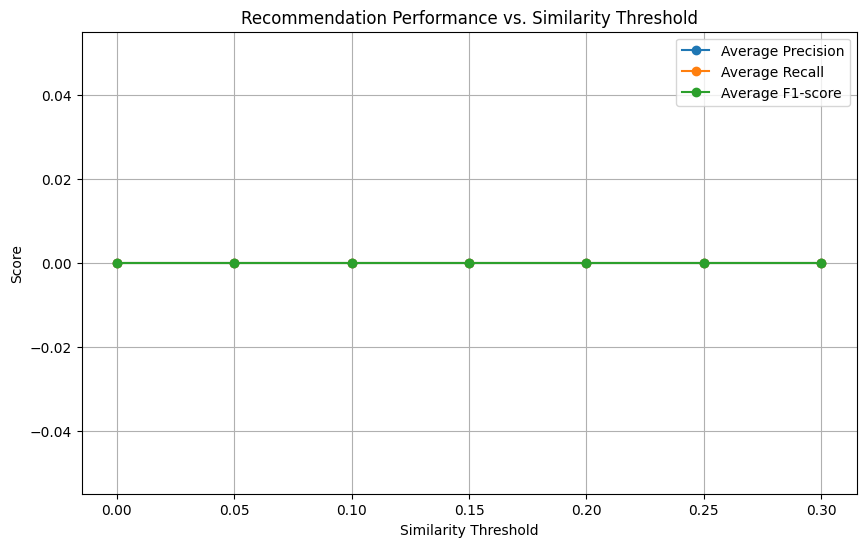

In [26]:
from sklearn.metrics import precision_score, recall_score
import matplotlib.pyplot as plt

# Function to calculate F1-score
def f1_score(precision, recall):
    """Calculates the F1-score given precision and recall."""
    if (precision + recall) == 0:
        return 0
    return 2 * (precision * recall) / (precision + recall)

# Function to get anime recommendations for a given user with a similarity threshold
def get_nmf_recommendations_with_threshold(user_id, threshold=0.1, n_recommendations=10):
    """
    Generates anime recommendations for a user using NMF with a similarity threshold.

    Args:
        user_id (int): The ID of the user.
        threshold (float, optional): The minimum predicted rating to consider for recommendation.
            Defaults to 0.1.
        n_recommendations (int, optional): The number of recommendations to generate.
            Defaults to 10.

    Returns:
        list: A list of recommended anime IDs.
    """
    try:
        # Get the user's predicted ratings
        user_predicted_ratings = predicted_ratings_df.loc[user_id]

        # Get the anime the user has already rated
        rated_anime = mapped_df[mapped_df['members'] == user_id]['anime_id'].tolist()

        # Filter out anime the user has already rated and apply the threshold
        recommendations = user_predicted_ratings[~user_predicted_ratings.index.isin(rated_anime)]
        recommendations = recommendations[recommendations > threshold]

        # Sort the predicted ratings in descending order and get the top N
        top_n_anime_ids = recommendations.sort_values(ascending=False).head(n_recommendations).index.tolist()

        return top_n_anime_ids

    except KeyError:
        return [] # Return an empty list if user ID is not found

# --- Experiment with different threshold values and evaluate performance ---

thresholds = [0.0, 0.05, 0.1, 0.15, 0.2, 0.25, 0.3] # Define different threshold values to experiment with

avg_precision_list = []
avg_recall_list = []
avg_f1_list = []

# Get a subset of unique user IDs from the original df for evaluation
# We will use a smaller subset for faster execution
subset_eval_users = df['members'].unique()[:500] # Evaluate on the first 500 unique users

for threshold in thresholds:
    precision_list = []
    recall_list = []
    f1_list = []

    for user_id in subset_eval_users:
        # Define ground truth: anime the user actually rated in the original df
        ground_truth_df = df[df['members'] == user_id]
        ground_truth_list = ground_truth_df['anime_id'].tolist() # Use anime_id for ground truth

        # Get recommendations using the NMF model with the current threshold
        recommended_list = get_nmf_recommendations_with_threshold(user_id, threshold=threshold, n_recommendations=10)

        # Calculate metrics only if there are recommendations and ground truth
        if recommended_list and ground_truth_list:
            # Create binary lists for precision and recall calculation
            # We need to check which recommended items are in the ground truth
            recommended_in_ground_truth = [1 if anime_id in ground_truth_list else 0 for anime_id in recommended_list]
            ground_truth_in_recommended = [1 if anime_id in recommended_list else 0 for anime_id in ground_truth_list]

            # To use precision_score and recall_score from sklearn, we need to ensure the lengths are consistent
            # and handle cases where there are no relevant items or no retrieved items.
            # A simpler way for recommendation systems is to calculate precision and recall manually:

            # True Positives: Recommended items that are in the ground truth
            true_positives = sum(recommended_in_ground_truth)

            # Precision@N: (Number of Recommended Items that are Relevant) / (Total Number of Recommended Items)
            precision = true_positives / len(recommended_list) if len(recommended_list) > 0 else 0

            # Recall@N: (Number of Recommended Items that are Relevant) / (Total Number of Relevant Items in Ground Truth)
            recall = true_positives / len(ground_truth_list) if len(ground_truth_list) > 0 else 0


            precision_list.append(precision)
            recall_list.append(recall)
            f1_list.append(f1_score(precision, recall))
        elif ground_truth_list: # If there's ground truth but no recommendations
             precision_list.append(0)
             recall_list.append(0)
             f1_list.append(0)
        # If there is no ground truth for the user in the evaluation set, we skip adding metrics for this user.


    # Calculate average metrics for the current threshold
    avg_precision = np.mean(precision_list) if precision_list else 0
    avg_recall = np.mean(recall_list) if recall_list else 0
    avg_f1 = np.mean(f1_list) if f1_list else 0

    avg_precision_list.append(avg_precision)
    avg_recall_list.append(avg_recall)
    avg_f1_list.append(avg_f1)

    print(f"Threshold: {threshold:.2f}, Avg Precision: {avg_precision:.4f}, Avg Recall: {avg_recall:.4f}, Avg F1-score: {avg_f1:.4f}")

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(thresholds, avg_precision_list, marker='o', label='Average Precision')
plt.plot(thresholds, avg_recall_list, marker='o', label='Average Recall')
plt.plot(thresholds, avg_f1_list, marker='o', label='Average F1-score')
plt.xlabel('Similarity Threshold')
plt.ylabel('Score')
plt.title('Recommendation Performance vs. Similarity Threshold')
plt.legend()
plt.grid(True)
plt.show()

#Answers for Interview Questions:

* User-based and item-based collabarative filtering is used mainly in instagram to recommend reels,posts to users,it collabarates all the users based on the similarity that means if person A and person B likes similar posts and then person B likes a new post now this new post will be recommended to person A.

* Collabarative filtering is the method where certain users with similarities will be collabarated then recommendations will take place from every user to user who has similarities based on the historical data.